In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train = sns.load_dataset("titanic")
train.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [35]:
for i in train:
    print(i)
    print(train[i].value_counts())
    print('________')

survived
0    549
1    342
Name: survived, dtype: int64
________
pclass
3    491
1    216
2    184
Name: pclass, dtype: int64
________
sex
male      577
female    314
Name: sex, dtype: int64
________
age
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64
________
sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
________
parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
________
fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64
________
embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
________
class
Third     491
First     216
Second    184
Name: class, dtype: int64
________
who
man      537
woman    271
child     83
Name:

In [9]:
train.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
feature_with_nan = [feature for feature in train.columns if train[feature].isnull().sum()>1]

for i in feature_with_nan:
    print(f"{i} = {np.round(train[i].isnull().mean(), 4)} percentage")

age = 0.1987 percentage
embarked = 0.0022 percentage
deck = 0.7722 percentage
embark_town = 0.0022 percentage


<AxesSubplot:>

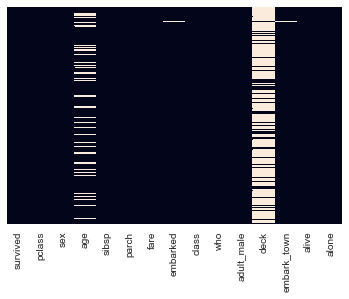

In [21]:
sns.heatmap(train.isnull(), yticklabels=False ,cbar=False)

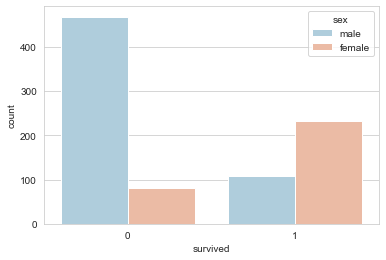

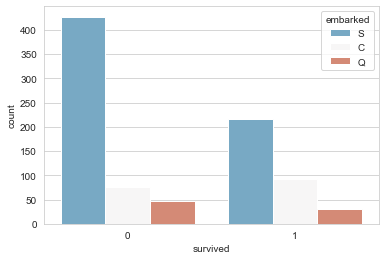

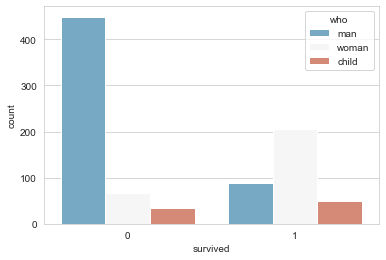

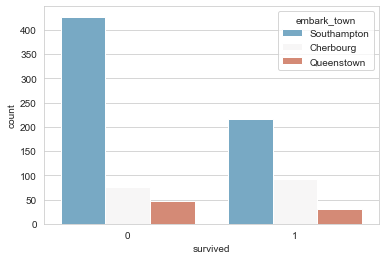

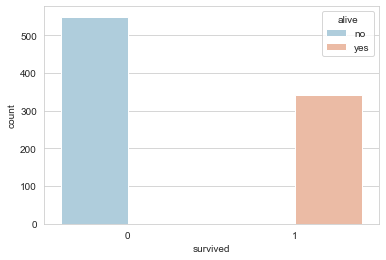

In [58]:
features = [feature for feature in train if train[feature].dtypes=='O']
for i, col in enumerate(train[features]):
    plt.figure(i)
    sns.set_style('whitegrid')
    sns.countplot(x='survived', hue=col, data=train, palette='RdBu_r')

<AxesSubplot:xlabel='survived', ylabel='count'>

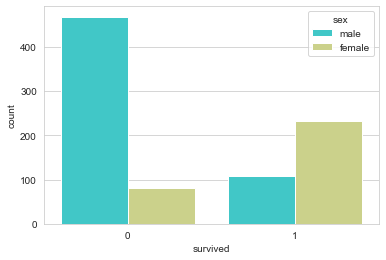

In [22]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived', hue='sex', data=train, palette='rainbow')

<AxesSubplot:xlabel='survived', ylabel='count'>

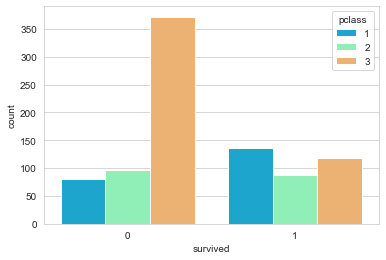

In [24]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived', hue='pclass', data= train, palette='rainbow')

<AxesSubplot:xlabel='survived', ylabel='count'>

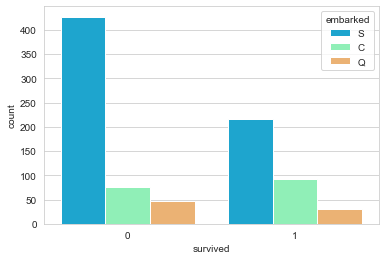

In [27]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived', hue = 'embarked', data = train, palette = 'rainbow')

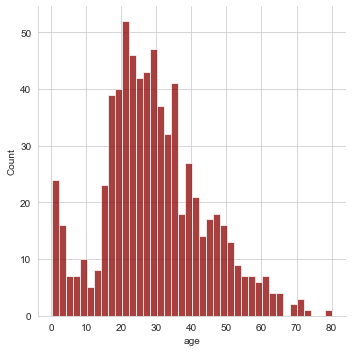

In [36]:
sns.displot(train['age'].dropna(),color = 'darkred', bins=40)